In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
import pandas as pd
import pickle
import string
import re
import string
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score, train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.svm import *
# from sklearn.tree import *
from sklearn.neural_network import *
from sklearn.linear_model import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import *
from sklearn.impute import IterativeImputer
from sklearn.naive_bayes import *
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [9]:
data = pd.read_pickle('imputed_data_forest_corr.pkl')
print(list(data.columns))
data.shape

['ITERATION', 'GPS_LAT', 'GPS_LON', 'GPS_ALT', 'HHsizemembers', 'LandCultivated', 'LivestockHoldings', 'NrofMonthsFoodInsecure', 'PPI_Threshold', 'PPI_Likelihood', 'score_HDDS_GoodSeason', 'score_HDDS_farmbasedGoodSeason', 'score_HDDS_purchasedGoodSeason', 'score_HDDS_BadSeason', 'score_HDDS_farmbasedBadSeason', 'score_HDDS_purchasedBadSeason', 'total_income_USD_PPP_pHH_Yr', 'offfarm_income_USD_PPP_pHH_Yr', 'value_farm_produce_USD_PPP_pHH_Yr', 'crop_sales_USD_PPP_pHH_Yr', 'value_crop_consumed_USD_PPP_pHH_Yr', 'value_livestock_production_USD_PPP_pHH_Yr', 'value_livestock_prod_consumed_USD_PPP_pHH_Yr', 'Market_Orientation', 'Livestock_Orientation', 'Food_Availability_kCal_MAE_day', 'Food_Self_Sufficiency_kCal_MAE_day', 'NrofMonthsWildFoodCons', 'GHGEmissions', 'Gender_MaleControl', 'Gender_FemaleControl', 'NFertInput', 'Food_InsecurityLevel', 'sinBestFoodSecMonth', 'cosBestFoodSecMonth', 'sinWorstFoodSecMonth', 'cosWorstFoodSecMonth', 'Head_EducationLevel_<Other>', 'Head_EducationLevel_<

(35728, 90)

In [10]:
X = data.drop(['Food_InsecurityLevel'],axis=1)
y = data[['Food_InsecurityLevel']]
print(y)

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_new2 = scaler.fit_transform(X_new)
# X_new2

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)

X_newer = pd.DataFrame(X_new)
X_newer.columns = [X.columns.tolist()]
X_newer

fs_ = SelectKBest(score_func=mutual_info_classif, k=70)
fs_.fit(X_newer, y)
mi_support = fs_.get_support()
X_new1 = fs_.transform(X_newer)

# clf = ExtraTreesClassifier(n_estimators=60)
# clf = clf.fit(X, y)
# clf.feature_importances_  
# model = SelectFromModel(clf, prefit=True)

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_new, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new1 = model.transform(X_new)

# transformer = SelectFromModel(estimator=AdaBoostClassifier()).fit(X_new, y)
# X_new1 = transformer.transform(X_new)

# from keras.utils import to_categorical
# y = to_categorical(y)
# y = y[:,[1,2,3,4]]
print(X_new1.shape)
y.shape

       Food_InsecurityLevel
0                         3
1                         4
2                         4
3                         2
4                         4
...                     ...
35723                     1
35724                     1
35725                     1
35726                     1
35727                     1

[35728 rows x 1 columns]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(35728, 70)


(35728, 1)

In [11]:
vector_names = list(X.columns[fs_.get_support(indices=True)])
len(vector_names)

70

In [12]:
X

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,...,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,1.0,11.19,-0.95,254.00,7.0,2.00,1.040,4.0,1.9,44.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,11.19,-0.95,346.00,10.0,1.20,4.000,3.0,1.9,40.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,11.19,-0.99,324.00,6.0,0.80,0.300,4.0,1.9,55.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,11.19,-0.99,326.00,6.0,0.80,2.595,4.0,1.9,32.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,11.22,-1.02,308.00,8.0,4.00,2.120,4.0,1.9,51.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35723,1.0,-13.82,32.67,1119.60,6.0,4.34,3.580,2.0,1.9,85.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35724,1.0,-13.82,32.67,1128.85,11.0,3.90,2.831,2.0,1.9,78.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35725,1.0,-13.82,32.67,1132.41,10.0,3.79,3.023,3.0,1.9,94.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35726,1.0,-13.82,32.67,1136.24,6.0,4.00,0.700,2.0,1.9,72.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
X_new1 = pd.DataFrame(X_new1)
X_new1.columns = [vector_names]
X_new1

,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,...,Country_<Morocco>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,0.480967,0.453380,0.215026,0.6,0.400,0.201161,0.333333,0.2,0.4469,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.480967,0.453380,0.224076,0.9,0.240,0.773694,0.250000,0.2,0.4068,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.480967,0.453175,0.221912,0.5,0.160,0.058027,0.333333,0.2,0.5503,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.480967,0.453175,0.222108,0.5,0.160,0.501934,0.333333,0.2,0.3223,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.481127,0.453022,0.220338,0.7,0.800,0.410058,0.333333,0.2,0.5167,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35723,0.347215,0.625147,0.300171,0.5,0.868,0.692456,0.166667,0.2,0.8510,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35724,0.347215,0.625147,0.301081,1.0,0.780,0.547582,0.166667,0.2,0.7840,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35725,0.347215,0.625147,0.301431,0.9,0.758,0.584720,0.250000,0.2,0.9400,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35726,0.347215,0.625147,0.301808,0.5,0.800,0.135397,0.166667,0.2,0.7220,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X_new1, y, test_size=0.25, random_state=0)
# X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.25, random_state=0)

In [15]:
X_test_val

,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,...,Country_<Morocco>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
12048,0.480271,0.457365,0.216580,0.1,0.16000,0.382979,0.166667,0.200000,0.0903,0.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18238,0.995759,0.527492,0.336787,0.1,0.30000,0.075435,0.166667,0.333333,0.0000,0.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35583,0.350424,0.625556,0.284774,0.3,0.49675,0.543520,0.166667,0.200000,0.6490,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24486,0.446157,0.499264,0.197202,0.4,0.16000,0.058027,0.166667,0.200000,0.0050,0.76,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16991,0.422032,0.640934,0.405145,0.3,0.04000,0.500580,0.166667,0.200000,0.2390,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19369,0.355504,0.685536,0.226505,0.1,0.03000,0.000000,0.166667,0.200000,0.2426,0.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10085,0.472998,0.661370,0.451496,0.3,0.15000,0.976789,0.166667,0.200000,0.1570,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6036,0.462998,0.431922,0.224825,0.4,0.15000,0.000000,0.166667,0.200000,0.2049,0.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24709,0.460109,0.487265,0.219618,0.5,0.06000,0.011605,0.083333,0.200000,0.1060,0.66,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X_train

,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,...,Country_<Morocco>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
5623,0.408556,0.605477,0.359062,1.0,0.8020,0.239845,0.000000,0.2,0.2458,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32426,0.594856,0.460231,0.238978,0.4,0.4800,0.633462,1.000000,0.2,0.1670,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5934,0.454067,0.427119,0.214440,0.0,0.2000,0.000000,0.166667,0.2,0.3583,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16092,0.421658,0.634548,0.329877,0.3,0.1440,0.328820,0.250000,0.2,0.0758,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30533,0.376147,0.628110,0.313981,1.0,0.8980,0.546615,0.000000,0.2,0.1190,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,0.489630,0.435498,0.226535,1.0,0.8424,0.270793,0.166667,1.0,0.9060,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32103,0.420909,0.621622,0.309653,0.1,0.1400,0.189555,0.000000,0.2,0.0594,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30403,0.399357,0.638839,0.377919,0.6,0.6400,0.594778,0.000000,0.2,0.5770,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21243,0.489844,0.434987,0.225748,0.4,0.8000,0.042553,0.250000,1.0,0.9790,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
print(len(X_train))
# print(len(X_val))
# print(len(X_test))
print(len(y_train))
# print(len(y_val))
# print(len(y_test))

# X_train

26796
26796


In [18]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Model

input_layer = Input(shape=(70,))
hidden_layer1 = Dense(256, activation='relu')(input_layer)
dropout_1 = Dropout(0.6)(hidden_layer1)
hidden_layer2 = Dense(256, activation='relu')(dropout_1)
dropout_2 = Dropout(0.6)(hidden_layer2)
hidden_layer3 = Dense(128, activation='relu')(dropout_2)
dropout_3 = Dropout(0.6)(hidden_layer3)
hidden_layer4 = Dense(128, activation='relu')(dropout_3)
dropout_4 = Dropout(0.6)(hidden_layer4)
hidden_layer5 = Dense(128, activation='relu')(dropout_4)
output = Dense(5, activation='softmax')(dropout_3)
model = Model(inputs = input_layer, outputs = output)



# model = Sequential()
# model.add(Dense(300, input_dim=89, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(300, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(300, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 70)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               18176     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0     

In [20]:
X_train

,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,...,Country_<Morocco>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
5623,0.408556,0.605477,0.359062,1.0,0.8020,0.239845,0.000000,0.2,0.2458,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32426,0.594856,0.460231,0.238978,0.4,0.4800,0.633462,1.000000,0.2,0.1670,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5934,0.454067,0.427119,0.214440,0.0,0.2000,0.000000,0.166667,0.2,0.3583,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16092,0.421658,0.634548,0.329877,0.3,0.1440,0.328820,0.250000,0.2,0.0758,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30533,0.376147,0.628110,0.313981,1.0,0.8980,0.546615,0.000000,0.2,0.1190,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,0.489630,0.435498,0.226535,1.0,0.8424,0.270793,0.166667,1.0,0.9060,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32103,0.420909,0.621622,0.309653,0.1,0.1400,0.189555,0.000000,0.2,0.0594,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30403,0.399357,0.638839,0.377919,0.6,0.6400,0.594778,0.000000,0.2,0.5770,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21243,0.489844,0.434987,0.225748,0.4,0.8000,0.042553,0.250000,1.0,0.9790,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X_test_val

,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,...,Country_<Morocco>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
12048,0.480271,0.457365,0.216580,0.1,0.16000,0.382979,0.166667,0.200000,0.0903,0.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18238,0.995759,0.527492,0.336787,0.1,0.30000,0.075435,0.166667,0.333333,0.0000,0.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35583,0.350424,0.625556,0.284774,0.3,0.49675,0.543520,0.166667,0.200000,0.6490,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24486,0.446157,0.499264,0.197202,0.4,0.16000,0.058027,0.166667,0.200000,0.0050,0.76,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16991,0.422032,0.640934,0.405145,0.3,0.04000,0.500580,0.166667,0.200000,0.2390,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19369,0.355504,0.685536,0.226505,0.1,0.03000,0.000000,0.166667,0.200000,0.2426,0.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10085,0.472998,0.661370,0.451496,0.3,0.15000,0.976789,0.166667,0.200000,0.1570,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6036,0.462998,0.431922,0.224825,0.4,0.15000,0.000000,0.166667,0.200000,0.2049,0.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24709,0.460109,0.487265,0.219618,0.5,0.06000,0.011605,0.083333,0.200000,0.1060,0.66,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
y_test_val

,Food_InsecurityLevel
12048,2
18238,1
35583,4
24486,2
16991,4
...,...
19369,4
10085,4
6036,3
24709,1


In [23]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test_val, y_test_val), epochs=100)

Epoch 1/100
838/838 [==============================] - 3s 3ms/step - loss: 1.3056 - accuracy: 0.4087 - val_loss: 1.0381 - val_accuracy: 0.5469
Epoch 2/100
838/838 [==============================] - 1s 1ms/step - loss: 1.0710 - accuracy: 0.5424 - val_loss: 0.9906 - val_accuracy: 0.5732
Epoch 3/100
838/838 [==============================] - 1s 1ms/step - loss: 1.0399 - accuracy: 0.5523 - val_loss: 0.9669 - val_accuracy: 0.5785
Epoch 4/100
838/838 [==============================] - 1s 1ms/step - loss: 1.0047 - accuracy: 0.5749 - val_loss: 0.9449 - val_accuracy: 0.6043
Epoch 5/100
838/838 [==============================] - 1s 2ms/step - loss: 0.9948 - accuracy: 0.5800 - val_loss: 0.9460 - val_accuracy: 0.6000
Epoch 6/100
838/838 [==============================] - 1s 2ms/step - loss: 0.9787 - accuracy: 0.5896 - val_loss: 0.9278 - val_accuracy: 0.6134
Epoch 7/100
838/838 [==============================] - 1s 2ms/step - loss: 0.9688 - accuracy: 0.5925 - val_loss: 0.9206 - val_accuracy: 0.6137

In [24]:
# !pip install shap
import shap

In [25]:
tester = X_test_val.sample(n=2000, random_state=0)
print(tester.shape)
tester

(2000, 70)


,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,...,Country_<Morocco>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
875,0.422669,0.530098,0.259384,0.3,0.8014,0.398453,0.000000,0.2,0.5830,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12986,0.559047,0.894140,0.186996,0.6,0.0795,0.058027,0.000000,0.2,0.0947,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32587,0.428664,0.618352,0.298942,0.1,0.0400,0.058027,0.583333,0.2,0.0000,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11159,0.469896,0.449752,0.212272,0.6,0.3200,0.579304,0.166667,0.2,0.1057,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29478,0.393528,0.627855,0.314028,0.9,0.7550,0.668472,0.000000,0.2,0.3120,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29331,0.380853,0.643437,0.265948,0.2,0.2400,0.000000,0.000000,0.2,0.0290,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34120,0.536371,0.999745,0.195550,0.3,0.0144,0.077369,0.000000,0.0,0.0360,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27233,0.409251,0.610075,0.351637,0.2,0.0625,0.135397,0.250000,0.2,0.2218,0.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2704,0.483694,0.458949,0.219748,0.7,0.3000,0.005803,0.166667,0.2,0.0060,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


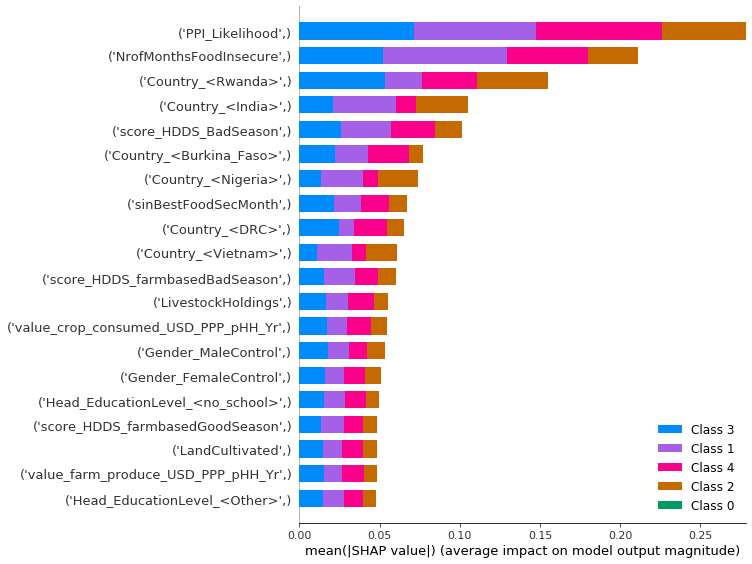

In [26]:
explainer = shap.DeepExplainer(model, np.array(X_train))
shap_values = explainer.shap_values(tester.values)
shap.summary_plot(shap_values, tester, plot_type="bar")

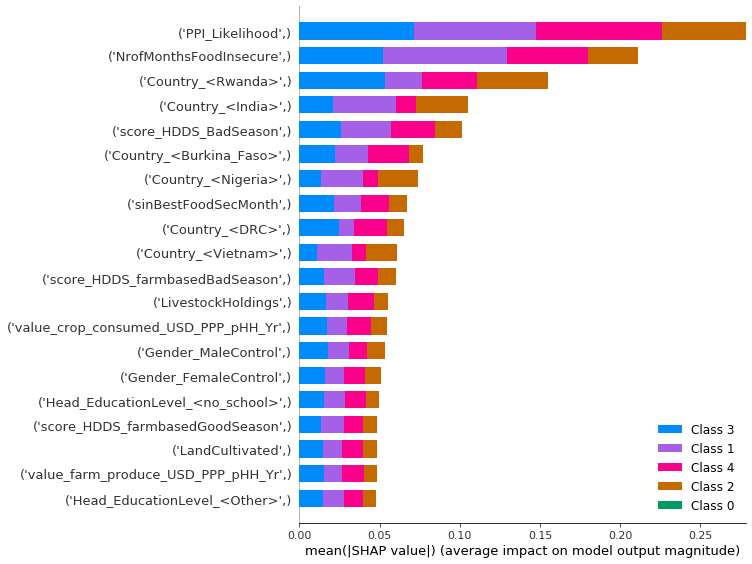

In [28]:
shap.summary_plot(shap_values, tester, plot_type="bar")

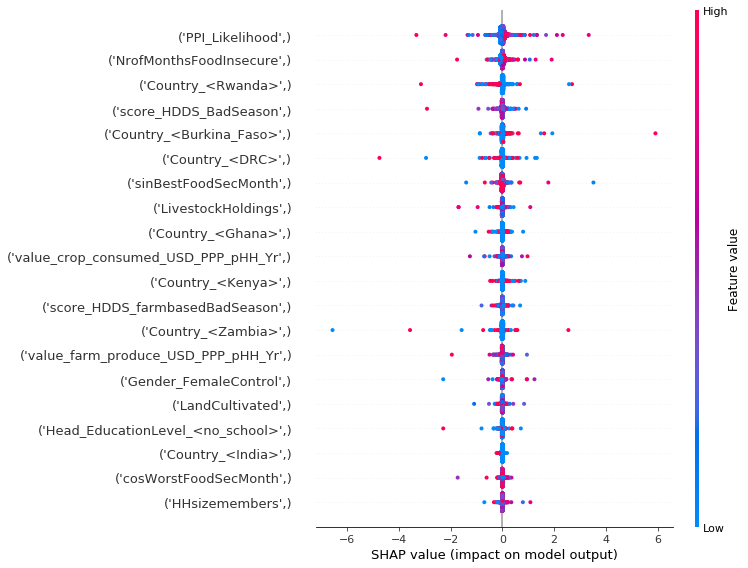

In [47]:
shap.summary_plot(shap_values[4], tester)

In [44]:
explainer = shap.KernelExplainer(model.predict, tester)
shap_values = explainer.shap_values(tester)

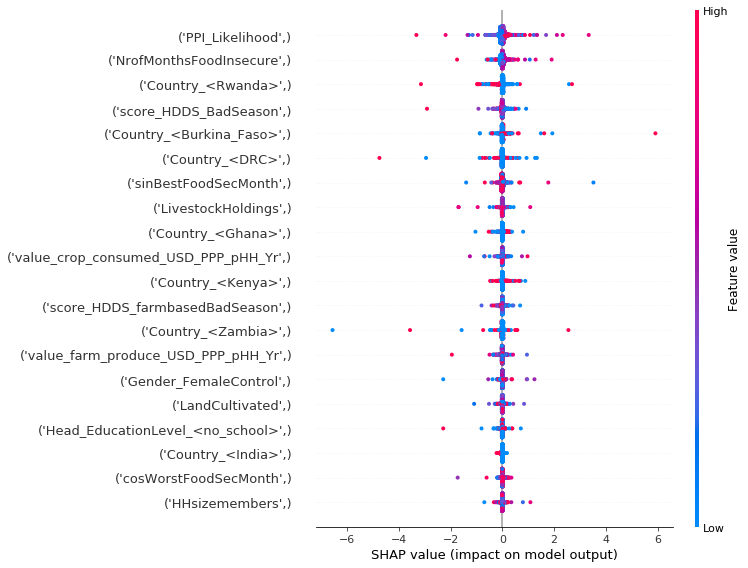

In [44]:
shap.summary_plot(shap_values[4], tester)

In [18]:
explainer = shap.KernelExplainer(model.predict, tester)
shap_values = explainer.shap_values(tester)

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


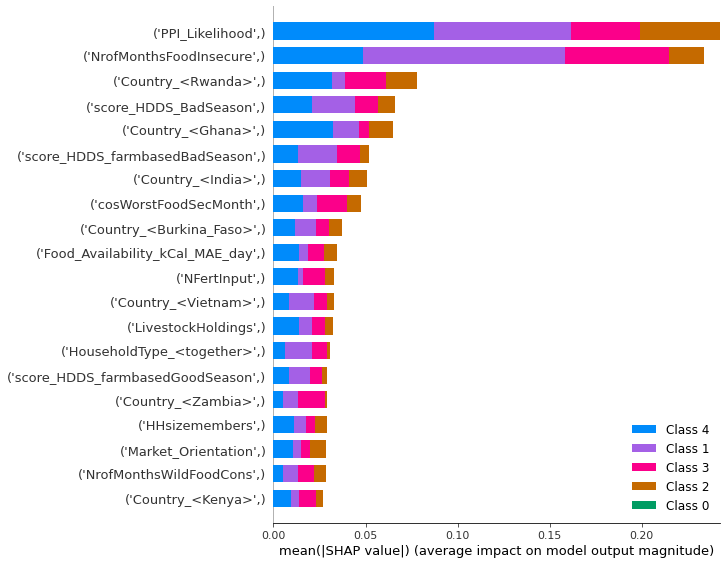

In [28]:
shap.summary_plot(shap_values, tester, plot_type="bar")

In [26]:
shap.summary_plot(shap_values, tester, plot_type='heatmap')

AssertionError: ignored

In [75]:
explainer_2 = shap.DeepExplainer(model, tester)
shap_values_2 = explainer_2.shap_values(tester)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.


AttributeError: ignored

In [ ]:
X.iloc[:, [23]]

,Market_Orientation
0,0.717683
1,0.061435
2,0.000000
3,0.899135
4,0.169250
...,...
35723,0.323274
35724,0.513858
35725,0.616394
35726,0.000000


In [ ]:
test.shape

(300, 70)

Train: 0.701, Validation: 0.644


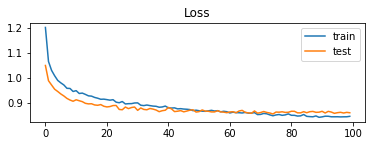

In [ ]:
# model.predict(X_test_val)
# model.evaluate(X_test_val, y_test_val)


# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_val, y_test_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, test_acc))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()


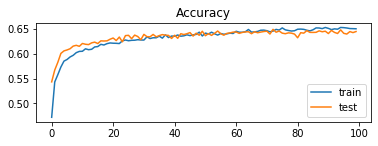

In [ ]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_val, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test_val, y_pred_bool))

8932/8932 [==============================] - 0s 22us/step
              precision    recall  f1-score   support

           1       0.70      0.84      0.76      3019
           2       0.67      0.24      0.35      1403
           3       0.57      0.56      0.56      2264
           4       0.63      0.72      0.67      2246

    accuracy                           0.64      8932
   macro avg       0.64      0.59      0.59      8932
weighted avg       0.64      0.64      0.63      8932



In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
model = DummyClassifier(strategy='most_frequent')
# fit model
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test_val)
# calculate accuracy
accuracy = accuracy_score(y_test_val, yhat)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.338


In [ ]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=100, learning_rate='adaptive').fit(X_train, y_train)
score = classifier.score(X_test_val, y_test_val)
score

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6307657859381998

In [ ]:
y_pred = classifier.predict(X_test_val)

print(classification_report(y_test_val, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.77      0.74      3019
           2       0.50      0.41      0.45      1403
           3       0.57      0.55      0.56      2264
           4       0.64      0.66      0.65      2246

    accuracy                           0.63      8932
   macro avg       0.60      0.60      0.60      8932
weighted avg       0.62      0.63      0.63      8932



In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier().fit(X_train, y_train)
score1 = classifier1.score(X_test_val, y_test_val)
print(score1)

y_pred1 = classifier1.predict(X_test_val)

print(classification_report(y_test_val, y_pred1))

In [ ]:

classifier2 = ExtraTreesClassifier().fit(X_train, y_train)
score2 = classifier2.score(X_test_val, y_test_val)
print(score1)

y_pred2 = classifier2.predict(X_test_val)

print(classification_report(y_test_val, y_pred2))